In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:
beta1, beta2, beta3 = 5, 6, 4
eta1 = eta2 = 0.25
ER1(a1) = 2.4 * a1
ER2(a2) = 4 - (2.828427125 * sqrt(a2) + 4) * exp(-0.7071067812 * sqrt(a2))

(1 + eta1) * (beta1 * ER1(1) + beta2 * 4 + beta3 / 0.25) +
(1 + eta2) * (beta1 * ER1(1) + beta2 * 4 + beta3 / 0.5)


p = 120.0;
k = (0.05 / 1.25) * p;
δ = 0.15;

F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
#F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
F2(x) = 1 - exp(-0.7071067812 * sqrt(x))
FR1(x, a1) = F1(x / a1)

function FR2(x, a2)
    if x < a2
        return F2(x)
    else
        return 1.0
    end
end

function FR12(x, a1, a2)
    if a1 == 0.5
        a1 = 0.5000001
    end
    if x < a2
        return 1 - (2 * a1 * exp(-0.25 * x / a1) - exp(-0.5 * x)) / (2 * a1 - 1)
    else
        return 1 -
               (2 * a1 - exp((0.25 / a1 - 0.5) * a2)) * exp(-0.25 * x / a1) /
               (2 * a1 - 1)
    end
end

FR(r, x) =
    0.3333333333333333 * FR1(x, r[1]) +
    0.4 * FR2(x, r[2]) +
    0.26666666666666666 * FR12(x, r[1], r[2])
ER1(a1) = 2.4 * a1
ER2(a2) = 4 - (2.828427125 * sqrt(a2) + 4) * exp(-0.7071067812 * sqrt(a2))
ER12(a1, a2) = 4 * a1 + 2 * (1 - exp(-0.5 * a2))
ER(r) =
    0.3333333333333333 * ER1(r[1]) +
    0.4 * ER2(r[2]) +
    0.26666666666666666 * ER12(r[1], r[2])

EnoR = ER([1.0, 100000.0])

4.0

In [3]:
res = bisection_hjbsolver(
    a=0,
    b=p / δ^2,
    max_it=20,
    NRe=2,
    β=5.0 + 6.0 + 4.0,
    FR=FR,
    ER=ER,
    EnoR=EnoR,
    partition=(0.0, 19.0, 200.0, 500.0),
    Δx=0.05,
    SearchRanges=([(0.0, 1.0), (0.2, 200.0)], [(0.0, 1.0), (1.0, 200.0)]),
    η=0.25,
    η1=0.3,
    δ=0.15,
    MaxEvals=2500,
    p=p,
    L=300,
)

(0, 2666.666666666667, 5333.333333333334)
(0, 1333.3333333333335, 2666.666666666667)
(0, 666.6666666666667, 1333.3333333333335)
10%, V(50.0) = 3039.6   Time = 286.0 seconds
20%, V(100.0) = 4689.9   Time = 1140.0 seconds
(0, 333.33333333333337, 666.6666666666667)
10%, V(50.0) = 1487.5   Time = 317.0 seconds
20%, V(100.0) = 2189.7   Time = 1230.0 seconds
30%, V(150.0) = 2995.8   Time = 2740.0 seconds
40%, V(200.0) = 4027.5   Time = 4350.0 seconds
50%, V(250.0) = 5406.9   Time = 4350.0 seconds
60%, V(300.0) = 7319.4   Time = 4350.0 seconds
(0, 166.66666666666669, 333.33333333333337)
10%, V(50.0) = 709.27   Time = 224.0 seconds
20%, V(100.0) = 930.54   Time = 871.0 seconds
30%, V(150.0) = 1058.1   Time = 1990.0 seconds
(166.66666666666669, 250.00000000000003, 333.33333333333337)
10%, V(50.0) = 1099.0   Time = 229.0 seconds
20%, V(100.0) = 1562.9   Time = 940.0 seconds
30%, V(150.0) = 2034.6   Time = 2060.0 seconds
40%, V(200.0) = 2565.2   Time = 3580.0 seconds
50%, V(250.0) = 3202.9   Time

8-element Vector{Any}:
 (0.0:0.05:8.95, [2666.666666666667, 2692.0438568223162, 2717.6699454117365, 2742.9542075986296, 2768.042045493696, 2793.0026336188325, 2817.87548996036, 2842.6848465797816, 2867.4458308819635, 2892.16765876214  …  5586.0816769184075, 5598.465065442886, 5610.821416538555, 5623.150939149887, 5635.453839438624, 5647.7303207224795, 5659.980583712319, 5672.20482638744, 5684.403244015564, 5696.576029379541], [507.5438031129828, 512.5217717884041, 505.68524373786323, 501.756757901333, 499.21176250272833, 497.45712683055024, 496.18713238843225, 495.2196860436402, 494.4365576035295, 493.7566739651234  …  247.6677704895656, 247.12702191339176, 246.59045222662365, 246.05800577473917, 245.52962567712166, 245.0052597967841, 244.48485350243746, 243.96835256248127, 243.45570727953478, 242.94686618526956], [0.9999999999999996 199.99999999999412; 0.9999999999896049 199.99999897083757; … ; 0.2760105859091913 199.99999841239264; 0.279068879069441 199.9999932812608], 1)
 (0.0:0.05:

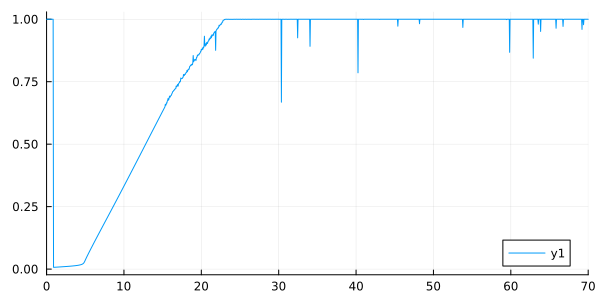

In [4]:
plot(res[end][1], res[end][4][:, 1], size = (600, 300), xlims = (0, 70))

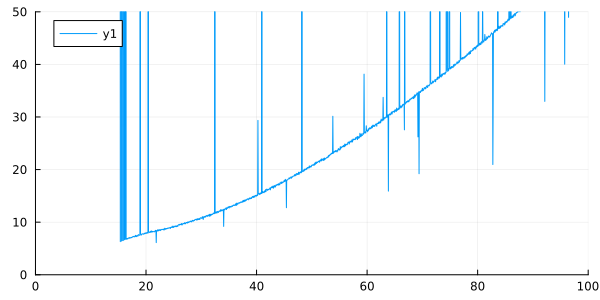

In [5]:
plot(res[end][1], res[end][4][:, 2], size = (600, 300), xlims = (0, 100), ylims = (0, 50))

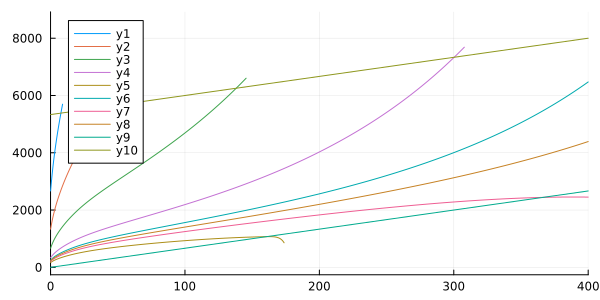

In [6]:
plot(res[1][1], res[1][2], size=(600, 300))
for i = 2:length(res)
    plot!(res[i][1], res[i][2], size=(600, 300))
end
plot!(x -> x / δ, xlims=(0, 400))
plot!(x -> x / δ + p / δ^2, xlims=(0, 400))